In [1]:
# Import necessary libraries
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
# Get and read the data

# Get data from ProPublica
url = 'https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv'
# Read and display summary
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

In [3]:
# Transform into a binary classification problem

# Create a feature to score recividism score
# Add new column that translates the risk score (decile_score) into a binary label
# Any score of 5 or higher (medium or high risk) means that a defendant is treated
# as a likely recividist, and a score of 4 or lower is considered as low risk. Low 
# risk means that a defendant is unlikely to re-offend.

# Create feature called 'is_med_or_high_risk'
df['is_med_or_high_risk'] = (df['decile_score'] >= 5).astype(int) #translate

In [4]:
# Preview new column
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid,is_med_or_high_risk
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1,0
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1,0
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0,1
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,Low,2013-03-26,NaN,NaN,2,0,1102,0,0,0


In [5]:
# Evaluate model performance

'''
To evaluate the performance of the model, we need to understand the model's 
prediction to the 'truth':
- The risk score of the COMPAS system is 'decile_score'
- The classificiation of COMPAS as low, medium, or high risk is in the newly 
created column called 'is_med_or_high_risk' column
- The 'true' recividism value (the risk that a criminal defendant will re-offend)
is in the 'two_year_recid' column.
'''

# Compute the accuracy
np.mean(df['is_med_or_high_risk'] == df['two_year_recid'])
np.mean(df['two_year_recid'])

"\nTo evaluate the performance of the model, we need to understand the model's \nprediction to the 'truth':\n- The risk score of the COMPAS system is 'decile_score'\n- The classificiation of COMPAS as low, medium, or high risk is in the newly \ncreated column called 'is_med_or_high_risk' column\n- The 'true' recividism value (the risk that a criminal defendant will re-offend)\nis in the 'two_year_recid' column.\n"

0.6537288605489326

0.45065151095092876

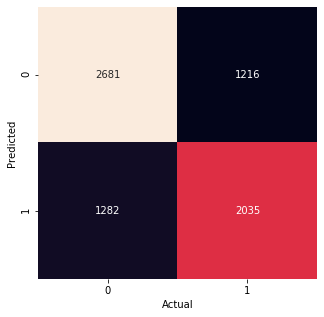

In [6]:
# Create a confusion matrix to derive a whole set of classifier metrics
# TPR, TNR, PPV, NPV, FPR, FDR, FNR, FOR
cm = pd.crosstab(df['is_med_or_high_risk'], df['two_year_recid'], 
                               rownames=['Predicted'], colnames=['Actual'])
p = plt.figure(figsize=(5,5));
p = sns.heatmap(cm, annot=True, fmt="d", cbar=False)

In [7]:
# Using sklearn's confusion matrix to pull out these values and compute any metrics
# of interest
[[tn , fp],[fn , tp]]  = confusion_matrix(df['two_year_recid'], df['is_med_or_high_risk'])
print("True negatives:  ", tn)
print("False positives: ", fp)
print("False negatives: ", fn)
print("True positives:  ", tp)

True negatives:   2681
False positives:  1282
False negatives:  1216
True positives:   2035


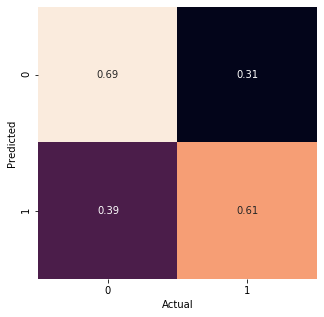

In [8]:
# Normalize by row - show the PPV, FDR, FOR, NPV
cm = pd.crosstab(df['is_med_or_high_risk'], df['two_year_recid'], 
                               rownames=['Predicted'], colnames=['Actual'], normalize='index')
p = plt.figure(figsize=(5,5));
p = sns.heatmap(cm, annot=True, fmt=".2f", cbar=False)

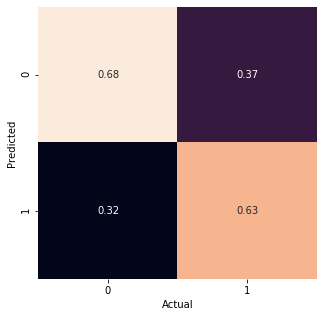

In [9]:
# Normalize by column, show the TPR, FPR, FNR, TNR
cm = pd.crosstab(df['is_med_or_high_risk'], df['two_year_recid'], 
                               rownames=['Predicted'], colnames=['Actual'], normalize='columns')
p = plt.figure(figsize=(5,5));
p = sns.heatmap(cm, annot=True, fmt=".2f", cbar=False)

In [10]:
fpr = fp/(fp+tn)
fnr  = fn/(fn+tp)

print("False positive rate (overall): ", fpr)
print("False negative rate (overall): ", fnr)

False positive rate (overall):  0.32349230381024474
False negative rate (overall):  0.3740387573054445


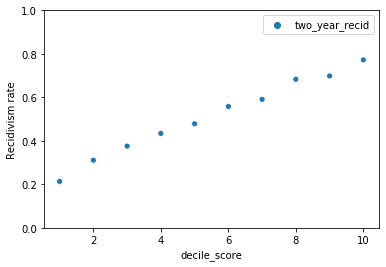

In [11]:
# Evaluate the risk score, instead of just labels
# The risk score is meant to indicate the probability that a defendant will re-offend
d = df.groupby('decile_score').agg({'two_year_recid': 'mean'})
# plot
sns.scatterplot(data=d);
plt.ylim(0,1);
plt.ylabel('Recidivism rate');

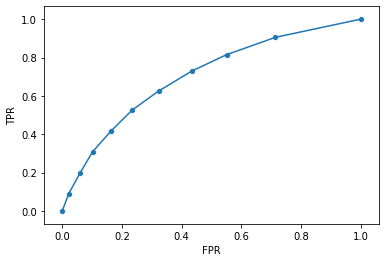

In [12]:
# By examining the graph above, we can see that defendants with a higher
# COMPAS score indeed had higher rates of recividism.
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(df['two_year_recid'], df['decile_score'])
sns.scatterplot(x=fpr, y=tpr, );
sns.lineplot(x=fpr, y=tpr);
plt.ylabel("TPR");
plt.xlabel("FPR");

In [13]:
auc = roc_auc_score(df['two_year_recid'], df['decile_score'])
auc

0.7021662544019724

In [15]:
# Accuracy show above: 0.7021662544019724

# Fairness
# Race is not an explicit input to COMPAS, but some of the questions are 
# directly correlated with race

# Race frequency in the data
df['race'].value_counts()

African-American    3696
Caucasian           2454
Hispanic             637
Other                377
Asian                 32
Native American       18
Name: race, dtype: int64

In [16]:
# The main focus here will be on African-Americans or Caucasian defendants,
# since they are the subject of the ProPublica claim
df = df[df.race.isin(["African-American", "Caucasian"])]
# Compare accuracy
(df['two_year_recid'] == df['is_med_or_high_risk']).astype(int).groupby(df['race']).mean()

race
African-American    0.638258
Caucasian           0.669927
dtype: float64

In [ ]:
# It's not completely the same, but very similar
# Here, we are assessing the type of fairness known as 'overall accuracy equality'

# Now, let's see whether a defendant who is classified as medium or high risk has 
# the same probability of recividism for the two groups.
# In other words, we will compute the PPV for each group

# Compute PPV
df[df['is_med_or_high_risk']]